<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_4_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as p
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('temps.csv')
print(df.head())


   year  month  day  week  temp_2  temp_1  average  actual  friend
0  2019      1    1   Fri      45      45     45.6      45      29
1  2019      1    2   Sat      44      45     45.7      44      61
2  2019      1    3   Sun      45      44     45.8      41      56
3  2019      1    4   Mon      44      41     45.9      40      53
4  2019      1    5  Tues      41      40     46.0      44      41


In [20]:
df.shape

(348, 9)

In [21]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

In [22]:
# checking for null values
df.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

In [23]:
# One-hot encode categorical features
df = pd.get_dummies(df)
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [24]:
print('Shape of features after one-hot encoding:', df.shape)

Shape of features after one-hot encoding: (348, 15)


In [25]:

labels = df['actual']
df = df.drop('actual', axis = 1)
feature_list = list(df.columns)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df,
                                                                            labels,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [27]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (278, 14)
Training Labels Shape: (278,)
Testing Features Shape: (70, 14)
Testing Labels Shape: (70,)


In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [29]:
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.78 degrees.


In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.02 %.


In [31]:
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

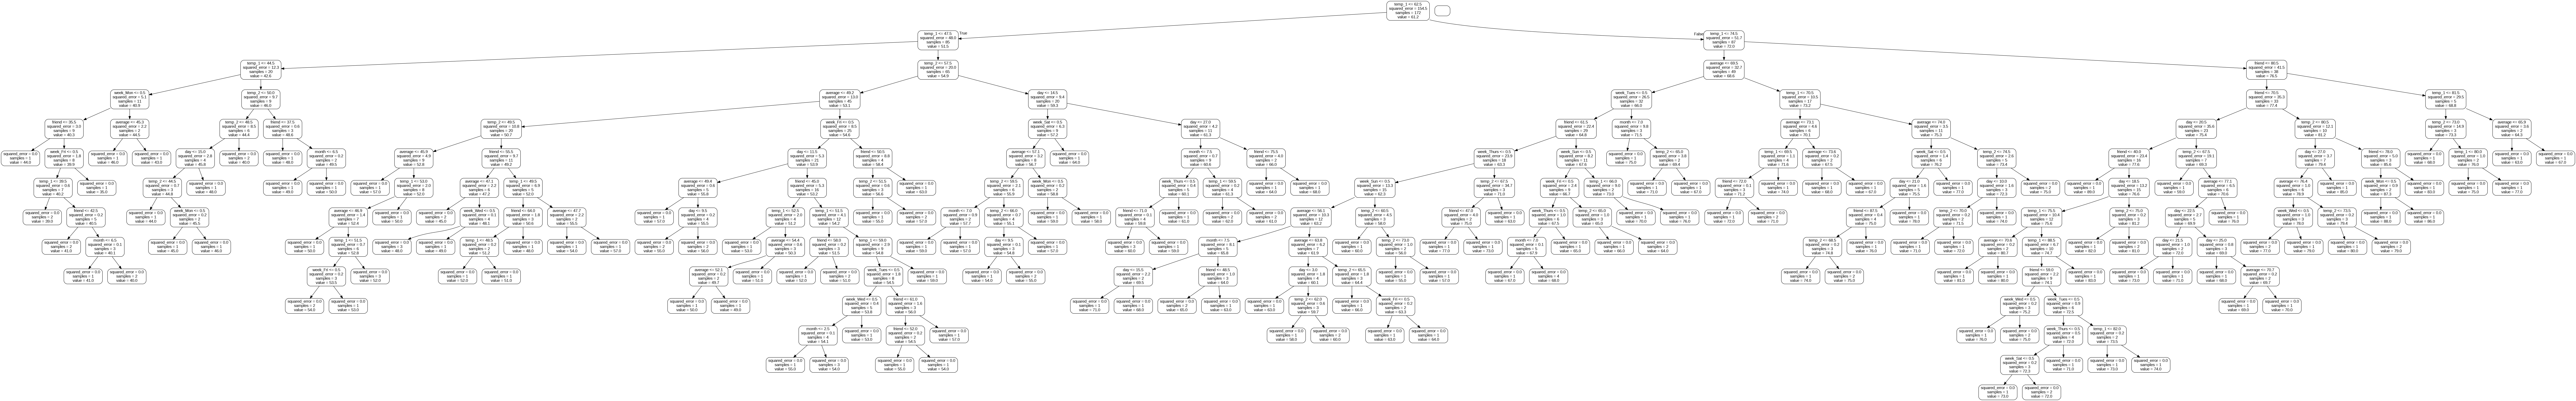

In [32]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 13
